<a href="https://colab.research.google.com/github/Dutra-Apex/llm-joc/blob/main/pre-processing/Word_cloud_and_tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Word Cloud

In [ ]:
!pip install wordcloud matplotlib

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [5]:
with open("/content/1-7-basics-bootcamp.txt", "r", encoding="utf-8") as file:
  text = file.read()

In [68]:
wordcloud = WordCloud(
    width = 800,      # Set width of image
    height = 400,     # Set height of image
    background_color = 'black',  # Set background color
    stopwords = STOPWORDS,       # Remove common words
    max_words = 100,             # Limit maximum number of words
    max_font_size = 80           # Set maximum font size
)

In [69]:
wordcloud.generate(text)

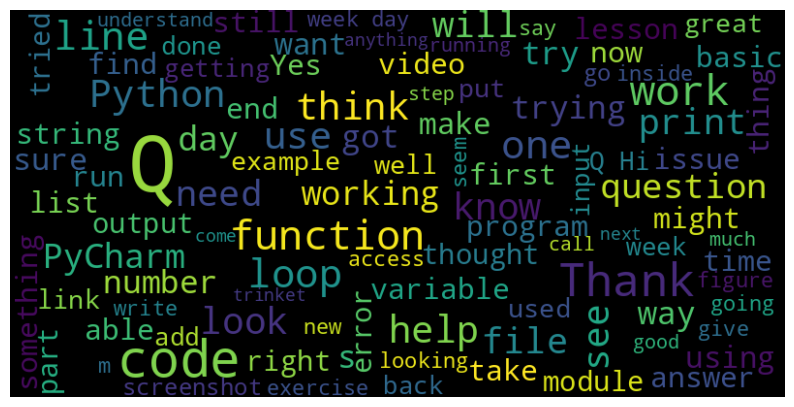

In [70]:
plt.figure(figsize=(10,6))  # Set figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")              # Hide axes
plt.show()

In [71]:
wordcloud.to_file("wordcloud.png")

#Term Frequency Inverse Document Frequency

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
# Create a TF-IDF vectorizer object
vectorizer = TfidfVectorizer(stop_words = 'english')

In [23]:
# Transform the text into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform([text])

In [24]:
# Get the feature names (words in the vocabulary)
feature_names = vectorizer.get_feature_names_out()

In [73]:
feature_names.shape


(4683,)

In [48]:
import pandas as pd

In [53]:
word_list = []
for i, word in enumerate(feature_names):
    word_list.append([word, round(tfidf_matrix[0, i], 4)])

In [56]:
df = pd.DataFrame(word_list, columns = ["Word", "tfidf"])

In [57]:
print(df.head())

                               Word   tfidf
0                                00  0.0013
1                              00pm  0.0004
2                                01  0.0004
3  01bbcfd2cd409840d6c21c4e6d3dbc74  0.0004
4                      02a9958159f4  0.0007


In [58]:
sorted_df = df.sort_values(by="tfidf", ascending=False)

In [77]:
sorted_df[:20].style.hide()

Word,tfidf
code,0.281200
just,0.245100
turtle,0.244400
print,0.198100
like,0.190900
python,0.186400
function,0.150300
help,0.136800
line,0.132700
day,0.132000


In [76]:
sorted_df[:200].to_csv("tfidf_7_basics.csv", index = False)

In [ ]:
for i, word in enumerate(feature_names):
    print(f"{word}: {tfidf_matrix[0, i]:.4f}")